**Decision_Tree**

In [1]:
#decision tree classification
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima.drop(pima.index[0], inplace=True)
pima.head()
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6804733727810651


Implement Peformance Metrics for Decision Tree Classifier and try to increase the accuracy of the model Explain 




In [2]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [3]:
for i in list(pima.columns)[:-1]:
    pima[i] = pima[i].astype('float64')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
stds=StandardScaler()

In [6]:
Xtrain_std=stds.fit_transform(X_train)

In [7]:
Xtest_std=stds.transform(X_test)

In [8]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       107
           1       0.57      0.50      0.53        62

    accuracy                           0.68       169
   macro avg       0.65      0.64      0.65       169
weighted avg       0.67      0.68      0.68       169



In [10]:
corr = pima.corr()
corr

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

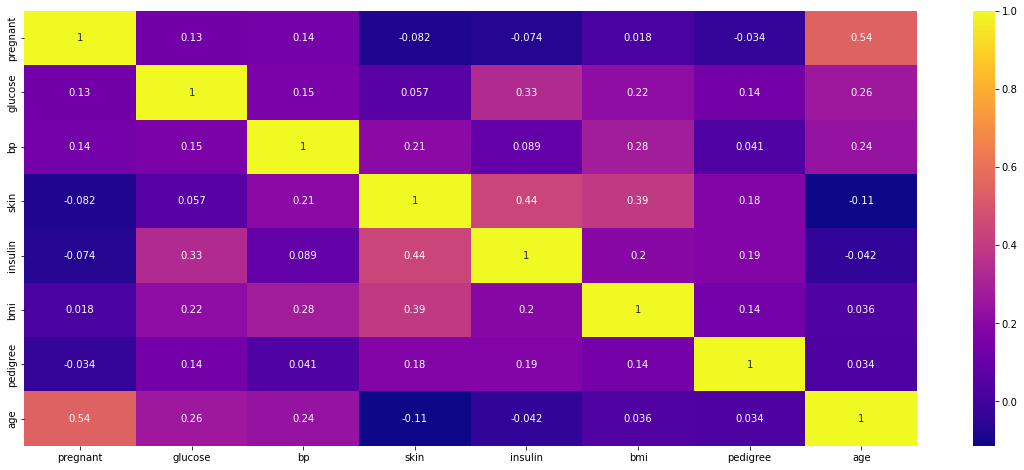

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,cmap='plasma',annot=True)

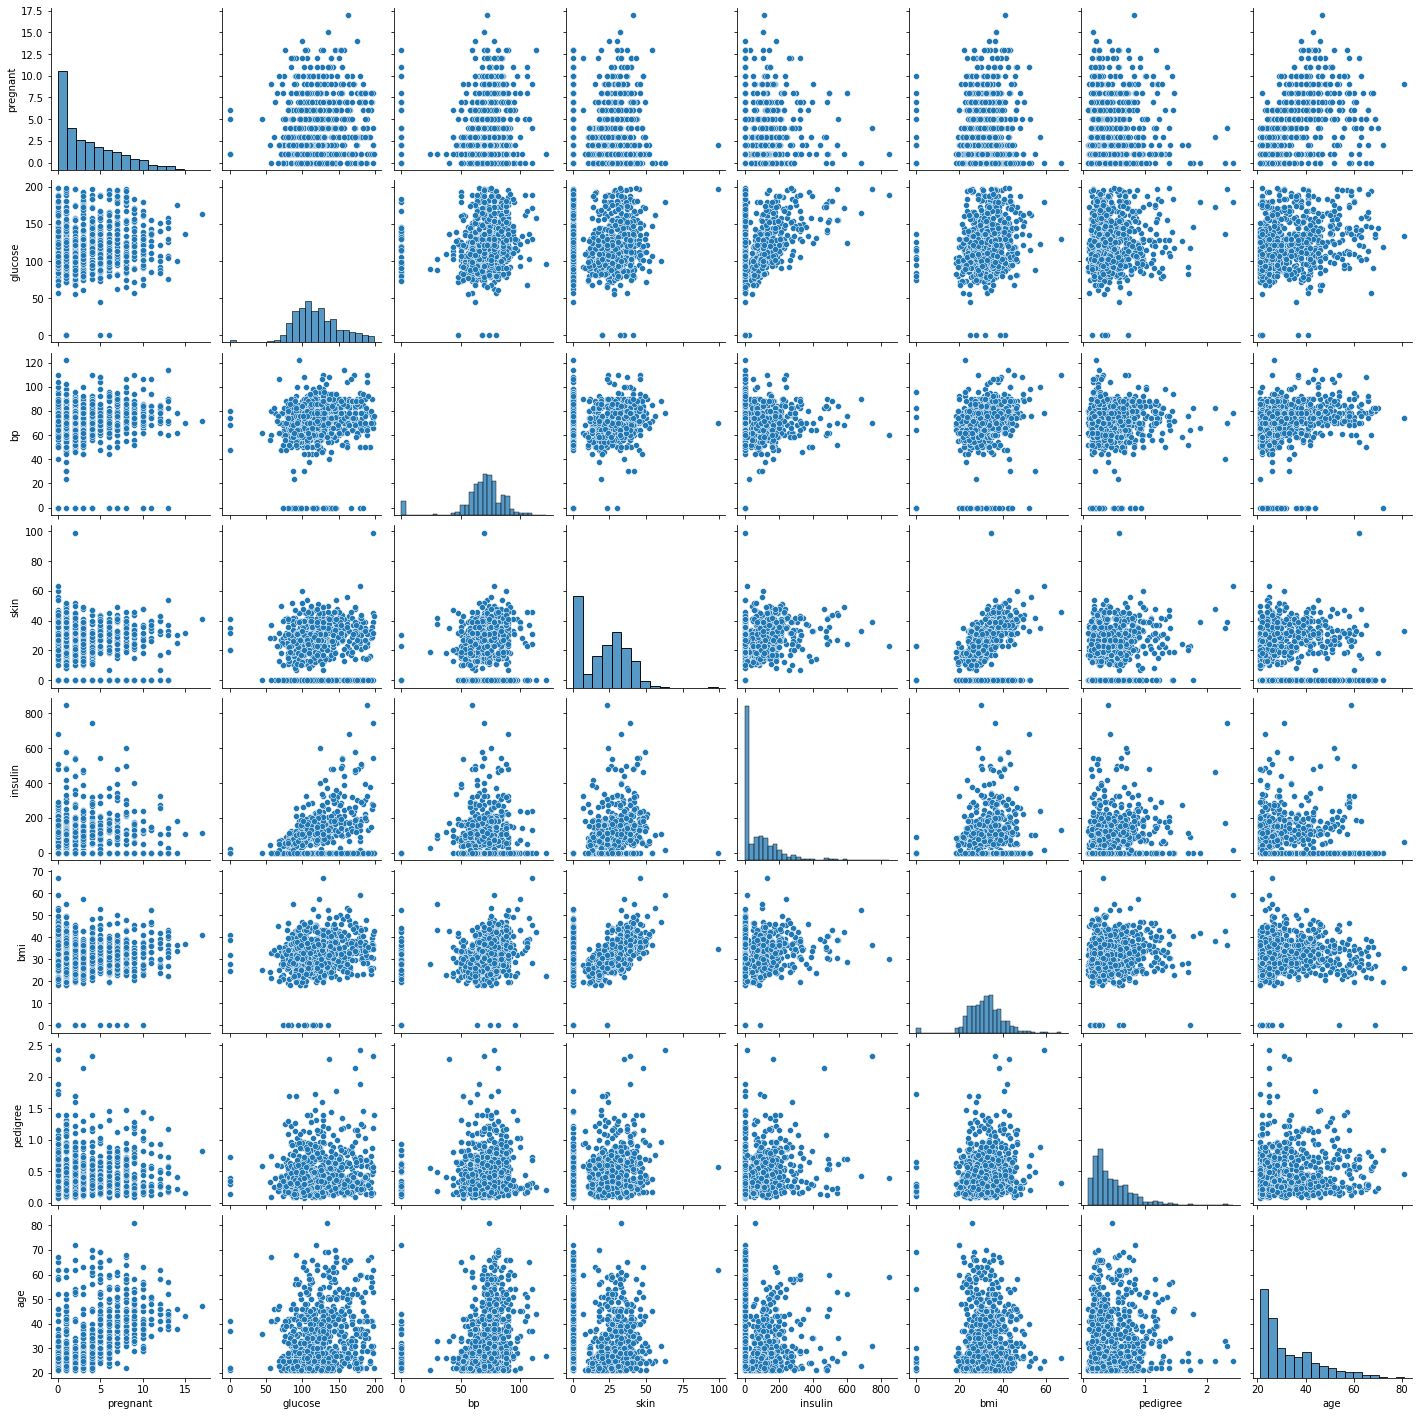

In [12]:
sns.pairplot(pima,diag_kind='hist')

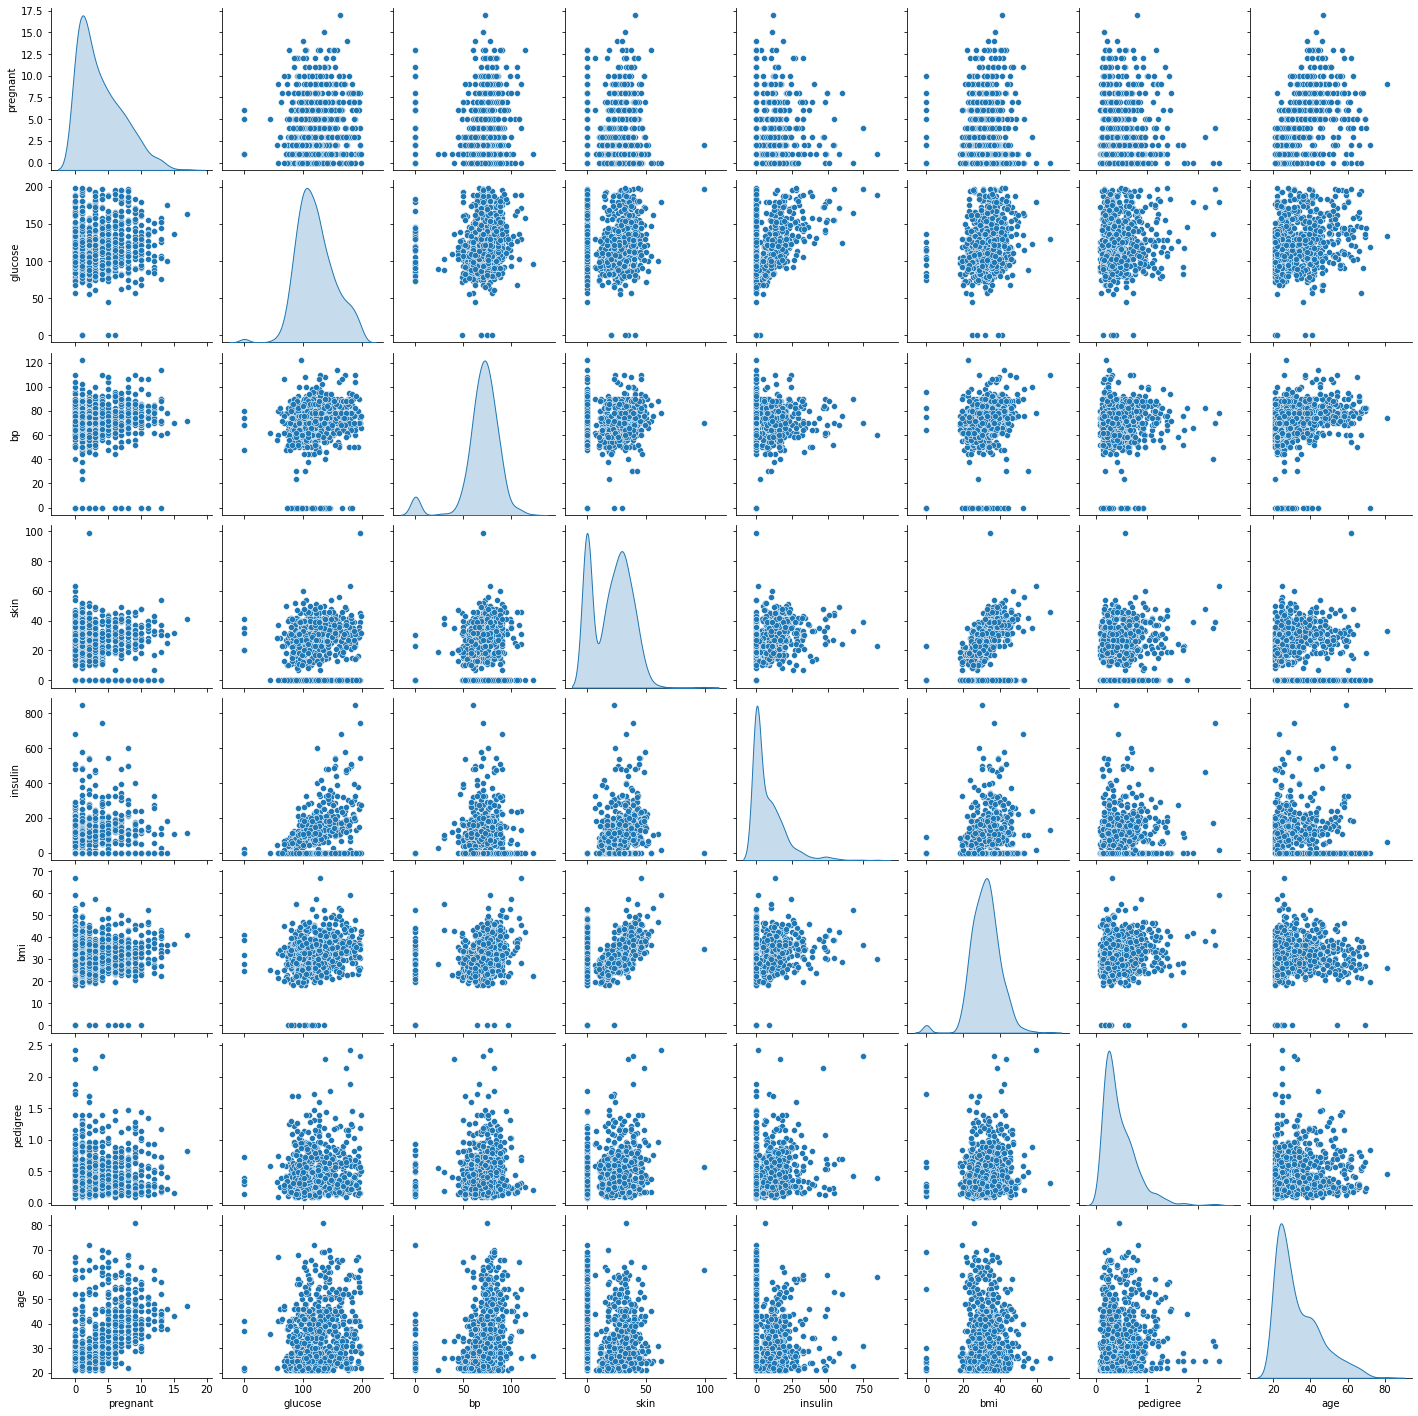

In [13]:
sns.pairplot(pima,diag_kind='kde')